In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preview of the Data

In [2]:
df = pd.read_csv("Impact_of_remote_Work_on_Mental_Health.csv")
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
# Checking for columns that will be less useful
df.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [4]:
# deleting all columns where mental health condition is null 
df_cleaned = df.dropna(subset = ["Mental_Health_Condition"])
df_cleaned.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition                 0
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1227
Sleep_Quality                           0
Region                                  0
dtype: int64

In [5]:
df_cleaned.describe()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3804 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        3804 non-null   object
 1   Age                                3804 non-null   int64 
 2   Gender                             3804 non-null   object
 3   Job_Role                           3804 non-null   object
 4   Industry                           3804 non-null   object
 5   Years_of_Experience                3804 non-null   int64 
 6   Work_Location                      3804 non-null   object
 7   Hours_Worked_Per_Week              3804 non-null   int64 
 8   Number_of_Virtual_Meetings         3804 non-null   int64 
 9   Work_Life_Balance_Rating           3804 non-null   int64 
 10  Stress_Level                       3804 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access_to_M

In [6]:
df_cleaned.shape

(3804, 20)

### Start of the Analysis

#### <span style = "color: green">Depression by Gender</span>

<Axes: ylabel='Gender'>

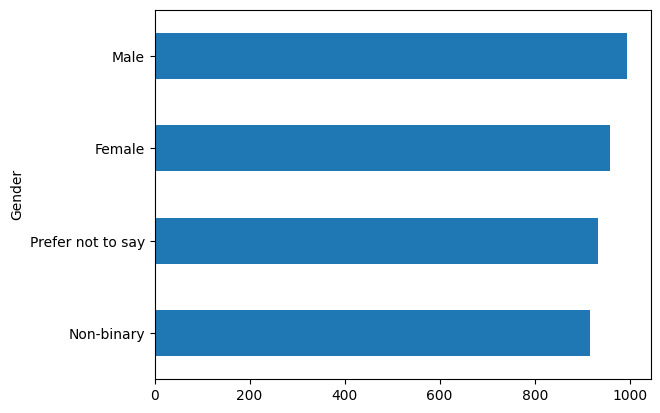

In [7]:
mental_by_gender = df_cleaned.groupby("Gender")["Employee_ID"].count().sort_values(ascending = True)
mental_by_gender.plot(kind = "barh")

#### <span style = "color: green">Depression by Industry</span>

<Axes: ylabel='Industry'>

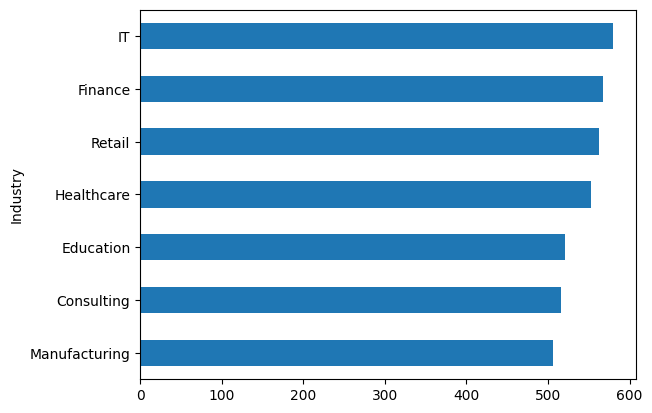

In [8]:
industry_by_depression = df_cleaned.groupby("Industry")["Employee_ID"].count().sort_values()
industry_by_depression.plot( kind = "barh")

#### <span style = "color: green">Depression by Job Role</span>

<Axes: ylabel='Job_Role'>

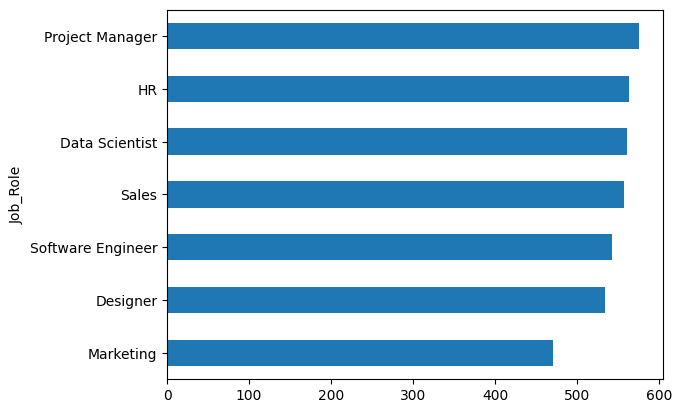

In [9]:
jobrole_by_depression = df_cleaned.groupby("Job_Role")["Employee_ID"].count().sort_values()
jobrole_by_depression.plot( kind = "barh")

<Axes: ylabel='Job_Role'>

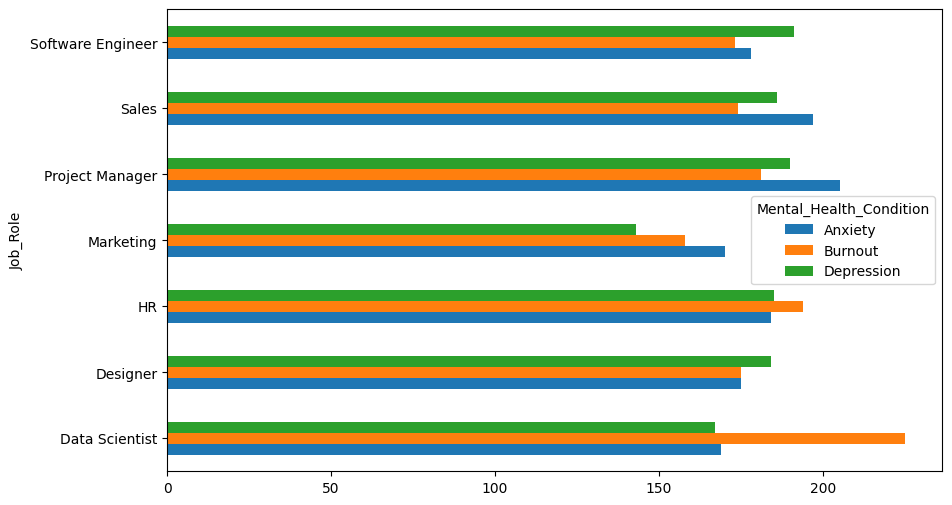

In [10]:
jobrole_by_depression = df_cleaned.groupby(["Job_Role", "Mental_Health_Condition"])["Employee_ID"].count().sort_values()
jobrole_by_depression = jobrole_by_depression.unstack(level=-1)  # Unstack the last level (Mental_Health_Condition)
jobrole_by_depression.plot(kind="barh", stacked=False, figsize =(10,6))

#### <span style = "color: green">Depression by Work Location Type</span>

<Axes: ylabel='Work_Location'>

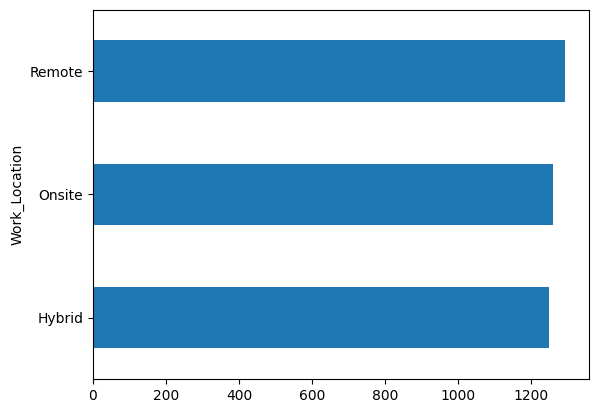

In [11]:
work_location_by_depression = df_cleaned.groupby("Work_Location")["Employee_ID"].count().sort_values()
work_location_by_depression.plot( kind = "barh")

<Axes: ylabel='Work_Location'>

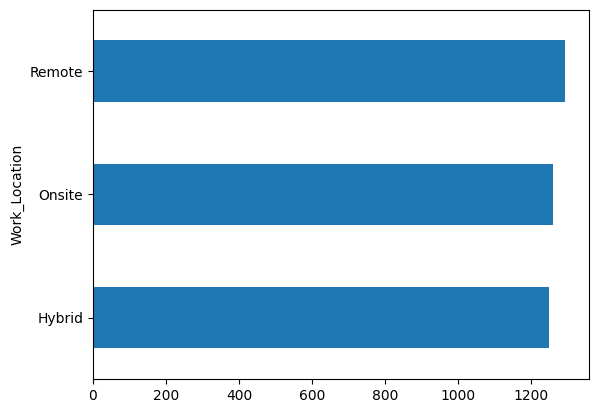

In [12]:
work_location_by_depression = df_cleaned.groupby("Work_Location")["Employee_ID"].count().sort_values()
work_location_by_depression.plot( kind = "barh")

<Axes: ylabel='Work_Location'>

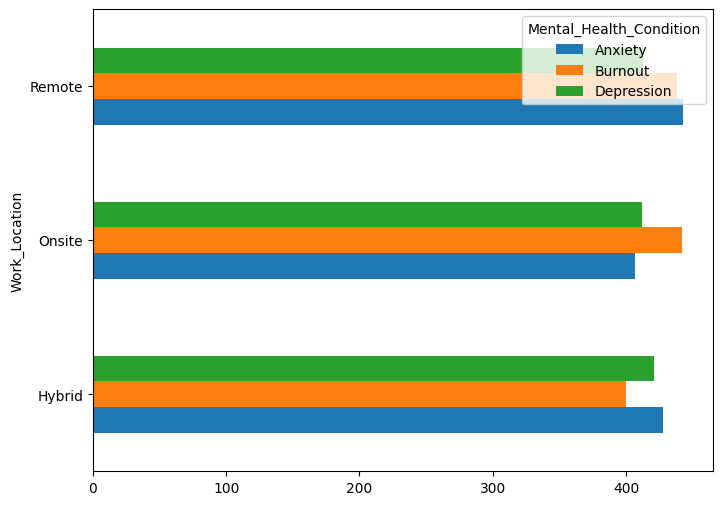

In [13]:
Work_Location_by_depression = df_cleaned.groupby(["Work_Location", "Mental_Health_Condition"])["Employee_ID"].count().sort_values()
Work_Location_by_depression = Work_Location_by_depression.unstack(level=-1)  # Unstack the last level (Mental_Health_Condition)
Work_Location_by_depression.plot(kind="barh", stacked=False, figsize =(8,6))

In [14]:
df_cleaned["Productivity_Change"].unique()

array(['Decrease', 'Increase', 'No Change'], dtype=object)

In [15]:
#  0   Employee_ID                        3804 non-null   object
#  1   Age                                3804 non-null   int64 
#  2   Gender                             3804 non-null   object
#  3   Job_Role                           3804 non-null   object
#  4   Industry                           3804 non-null   object
#  5   Years_of_Experience                3804 non-null   int64 
#  6   Work_Location                      3804 non-null   object
#  7   Hours_Worked_Per_Week              3804 non-null   int64 
#  8   Number_of_Virtual_Meetings         3804 non-null   int64 
#  9   Work_Life_Balance_Rating           3804 non-null   int64 
#  10  Stress_Level                       3804 non-null   object
#  11  Mental_Health_Condition            3804 non-null   object
#  12  Access_to_Mental_Health_Resources  3804 non-null   object
#  13  Productivity_Change                3804 non-null   object
#  14  Social_Isolation_Rating            3804 non-null   int64 
#  15  Satisfaction_with_Remote_Work      3804 non-null   object
#  16  Company_Support_for_Remote_Work    3804 non-null   int64 
#  17  Physical_Activity                  2577 non-null   object
#  18  Sleep_Quality                      3804 non-null   object
#  19  Region    

#### <span style = "color: green">How depression affected productivity change</span>

<Axes: xlabel='Productivity_Change'>

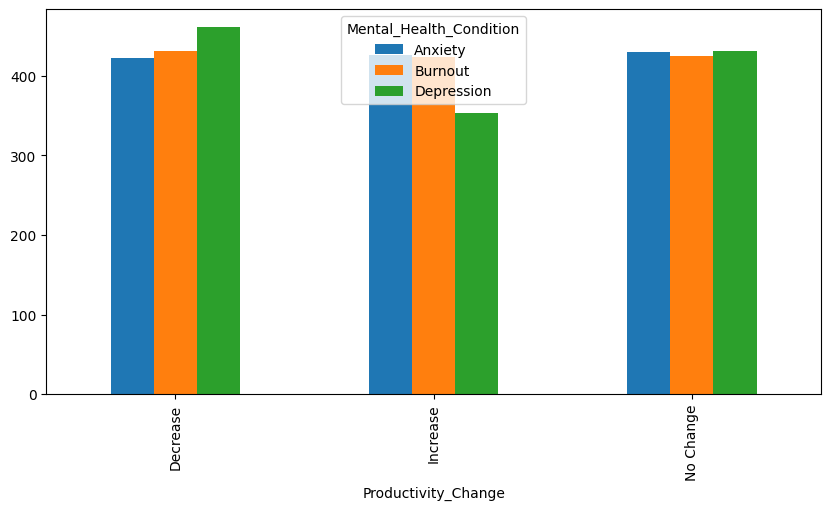

In [24]:
# productivity_change_by_depresion= df_cleaned.groupby(["Productivity_Change", "Mental_Health_Condition"]).["Employee_ID"].count()
productivity_change_by_depression = df_cleaned.groupby(["Productivity_Change", "Mental_Health_Condition"])["Employee_ID"].count().sort_values()
productivity_change_by_depression = productivity_change_by_depression.unstack(level = -1)
productivity_change_by_depression.plot(kind = "bar", figsize = (10,5))

#### <span style = "color: green">Depression by Social Isolation Rating</span>

<Axes: ylabel='Social_Isolation_Rating'>

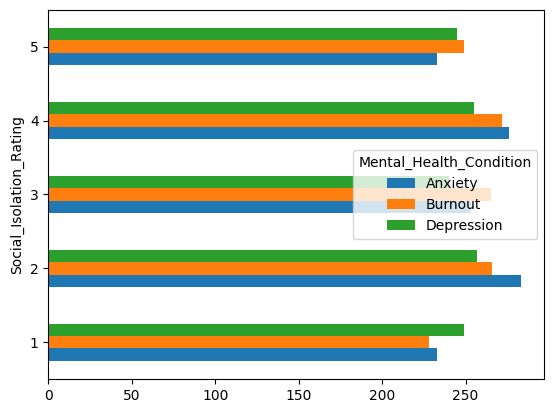

In [34]:
Social_Isolation_Rating_by_depression = df_cleaned.groupby(["Social_Isolation_Rating","Mental_Health_Condition"])["Employee_ID"].count().sort_values()
Social_Isolation_Rating_by_depression = Social_Isolation_Rating_by_depression.unstack(level = -1)
Social_Isolation_Rating_by_depression.plot(kind = "barh")

#### <span style = "color: green">Depression by Remote Work Satisfaction Suppor</span>

<Axes: xlabel='Satisfaction_with_Remote_Work'>

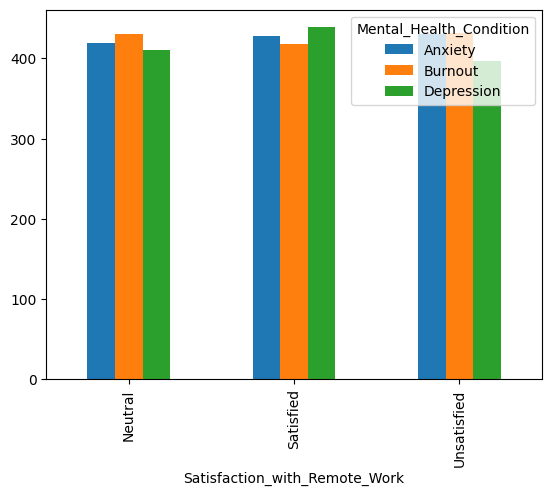

In [46]:
#using the unique values to view all the distinct  or range of values found in the range
df["Satisfaction_with_Remote_Work"].unique()
satisfaction_by_depression = df_cleaned.groupby(["Satisfaction_with_Remote_Work", "Mental_Health_Condition"])["Employee_ID"].count().sort_values()
satisfaction_by_depression = satisfaction_by_depression.unstack(level = -1)
satisfaction_by_depression.plot(kind = "bar")

<Axes: xlabel='Satisfaction_with_Remote_Work'>

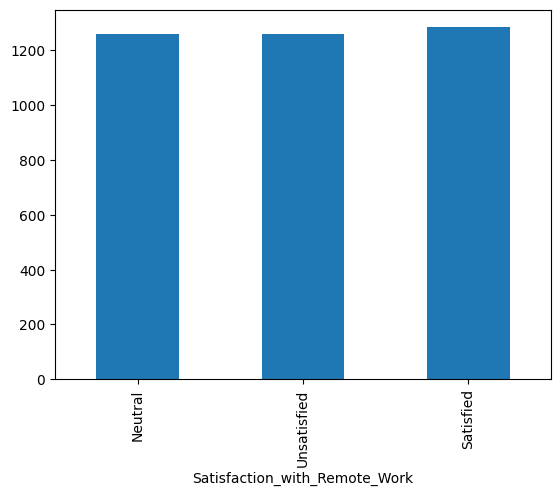

In [47]:
satisfaction_by_depression = df_cleaned.groupby(["Satisfaction_with_Remote_Work"])["Employee_ID"].count().sort_values()
satisfaction_by_depression.plot(kind = "bar")

#### <span style = "color: green">Depression by Work Remote Support</span>

<Axes: ylabel='Company_Support_for_Remote_Work'>

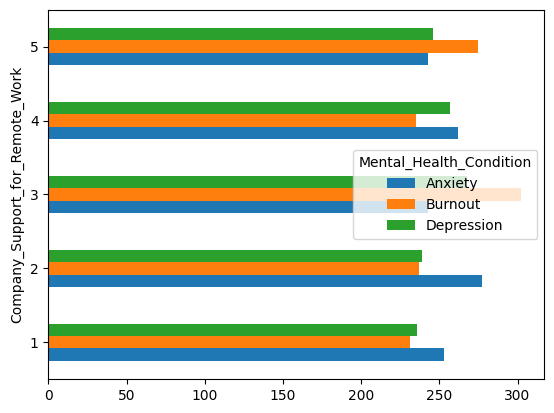

In [51]:
df_cleaned["Company_Support_for_Remote_Work"].unique()
csupport_by_depression = df_cleaned.groupby(["Company_Support_for_Remote_Work", "Mental_Health_Condition"])["Employee_ID"].count()
csupport_by_depression = csupport_by_depression.unstack(level = -1)
csupport_by_depression.plot(kind = "barh")

In [ ]:

#  18  Sleep_Quality                      3804 non-null   object
#  19  Region

#### <span style = "color: green">Depression by Region</span>

<Axes: ylabel='Region'>

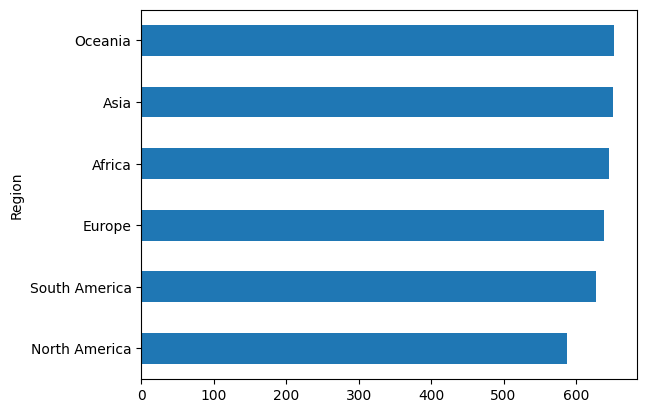

In [57]:
df_cleaned["Region"].unique()
depression_by_region = df_cleaned.groupby("Region")["Employee_ID"].count().sort_values()
depression_by_region.plot(kind = "barh")